# U-Net Semantic Segmentation Training Dataset
### QCar2 Autonomous Driving - Lane Segmentation

Este notebook demuestra:
- Carga del dataset preparado
- Visualización de máscaras de segmentación
- Overlay de segmentación sobre imágenes originales

## 1. Setup e Imports

In [1]:
!ls
!cd qcar2_LaneSeg-ACC/train_unet
!ls

isaac_ros_common	      isaac_ros_nitros	    qcar2_LaneSeg-ACC
isaac_ros_dnn_inference       qcar2_autonomy	    qcar2_nodes
isaac_ros_image_pipeline      qcar2_interfaces	    teleop_twist_keyboard
isaac_ros_image_segmentation  qcar2_lane_following
isaac_ros_common	      isaac_ros_nitros	    qcar2_LaneSeg-ACC
isaac_ros_dnn_inference       qcar2_autonomy	    qcar2_nodes
isaac_ros_image_pipeline      qcar2_interfaces	    teleop_twist_keyboard
isaac_ros_image_segmentation  qcar2_lane_following


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import random
import sys
import os
dir=sys.path.append("qcar2_LaneSeg-ACC/train_unet")
!ls
# Import local modules
import config
from prepare_dataset import visualize_mask, overlay_mask_on_image

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

print("✅ Imports successful!")
print(f"Number of classes: {config.NUM_CLASSES}")

isaac_ros_common	      isaac_ros_nitros	    qcar2_LaneSeg-ACC
isaac_ros_dnn_inference       qcar2_autonomy	    qcar2_nodes
isaac_ros_image_pipeline      qcar2_interfaces	    teleop_twist_keyboard
isaac_ros_image_segmentation  qcar2_lane_following
✅ Imports successful!
Number of classes: 4


## 2. Class Configuration

In [3]:
# Display class mapping
print("Semantic Segmentation Classes:\n")
for class_id in range(config.NUM_CLASSES):
    class_name = config.get_class_name(class_id)
    color_rgb = config.get_class_color(class_id, bgr=False)
    print(f"  Clase {class_id}: {class_name}")
    print(f"    RGB: {color_rgb}\n")

Semantic Segmentation Classes:

  Clase 0: Fondo / Vereda / Obstáculos
    RGB: (0, 0, 0)

  Clase 1: Camino / Asfalto transitable
    RGB: (0, 0, 255)

  Clase 2: Líneas de tráfico
    RGB: (255, 255, 0)

  Clase 3: Bordes de camino
    RGB: (255, 0, 0)



## 3. Color Legend Visualization

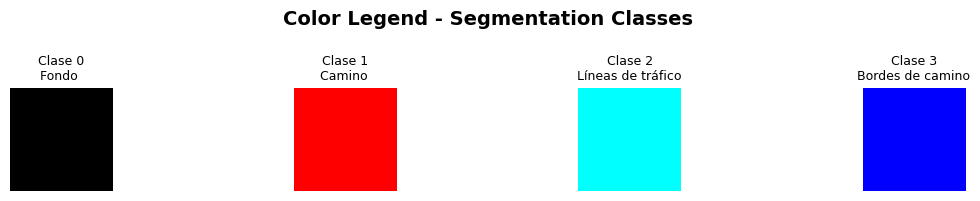

In [4]:
# Create color legend
fig, axes = plt.subplots(1, config.NUM_CLASSES, figsize=(12, 2))

for class_id in range(config.NUM_CLASSES):
    color_rgb = config.get_class_color(class_id, bgr=False)
    class_name = config.get_class_name(class_id)
    
    # Create solid color patch
    color_patch = np.ones((50, 50, 3), dtype=np.uint8)
    color_patch[:, :] = color_rgb
    
    # Display
    axes[class_id].imshow(cv2.cvtColor(color_patch, cv2.COLOR_BGR2RGB))
    axes[class_id].set_title(f"Clase {class_id}\n{class_name.split('/')[0]}", fontsize=9)
    axes[class_id].axis('off')

plt.suptitle('Color Legend - Segmentation Classes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Load Dataset

In [5]:
# Dataset paths
print(dir)
!ls
dataset_base = Path("qcar2_LaneSeg-ACC/train_unet/training_data/dataset_images")

train_images_path = dataset_base / 'train' / 'images'
train_masks_path = dataset_base / 'train' / 'masks'

# Get list of files
if train_images_path.exists():
    image_files = sorted(list(train_images_path.glob('*.png')))
    mask_files = sorted(list(train_masks_path.glob('*.png')))
    
    print(f"📁 Found {len(image_files)} training images")
    print(f"📁 Found {len(mask_files)} training masks")
    
    if len(image_files) != len(mask_files):
        print("⚠️  Warning: Number of images and masks do not match!")
else:
    print("❌ Dataset not found! Run prepare_dataset.py first.")
    image_files = []
    mask_files = []

None
isaac_ros_common	      isaac_ros_nitros	    qcar2_LaneSeg-ACC
isaac_ros_dnn_inference       qcar2_autonomy	    qcar2_nodes
isaac_ros_image_pipeline      qcar2_interfaces	    teleop_twist_keyboard
isaac_ros_image_segmentation  qcar2_lane_following
📁 Found 5 training images
📁 Found 5 training masks


## 5. Visualize Random Sample

Sample 1: img_00001.png
Image shape: (480, 640, 3)
Mask shape: (480, 640)
Classes present: [0 1 2 3]


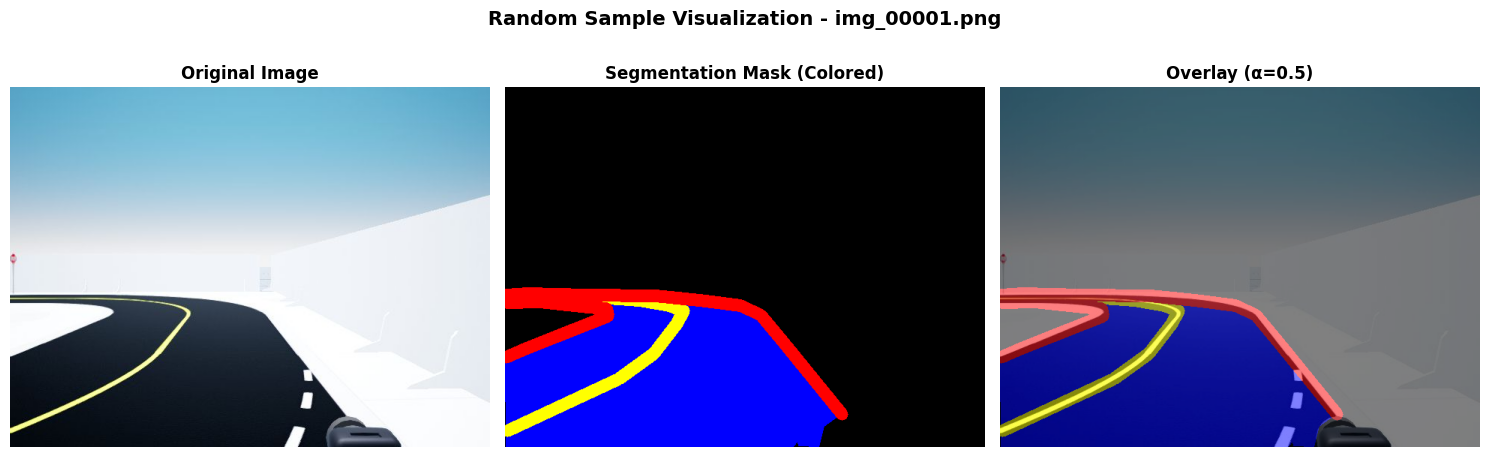

In [6]:
if image_files:
    # Select random sample
    idx = random.randint(0, len(image_files) - 1)
    
    # Load image and mask
    image = cv2.imread(str(image_files[idx]))
    mask = cv2.imread(str(mask_files[idx]), cv2.IMREAD_GRAYSCALE)
    
    # Check unique classes in this mask
    unique_classes = np.unique(mask)
    print(f"Sample {idx + 1}: {image_files[idx].name}")
    print(f"Image shape: {image.shape}")
    print(f"Mask shape: {mask.shape}")
    print(f"Classes present: {unique_classes}")
    
    # Create visualizations
    colored_mask = visualize_mask(mask, use_colors=True)
    overlay = overlay_mask_on_image(image, mask, alpha=0.5)
    
    # Plot
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original image
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image', fontsize=12, fontweight='bold')
    axes[0].axis('off')
    
    # Colored mask
    axes[1].imshow(cv2.cvtColor(colored_mask, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Segmentation Mask (Colored)', fontsize=12, fontweight='bold')
    axes[1].axis('off')
    
    # Overlay
    axes[2].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Overlay (α=0.5)', fontsize=12, fontweight='bold')
    axes[2].axis('off')
    
    plt.suptitle(f'Random Sample Visualization - {image_files[idx].name}', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("❌ No images to display")

## 6. Class Distribution Analysis

Analyzing class distribution...


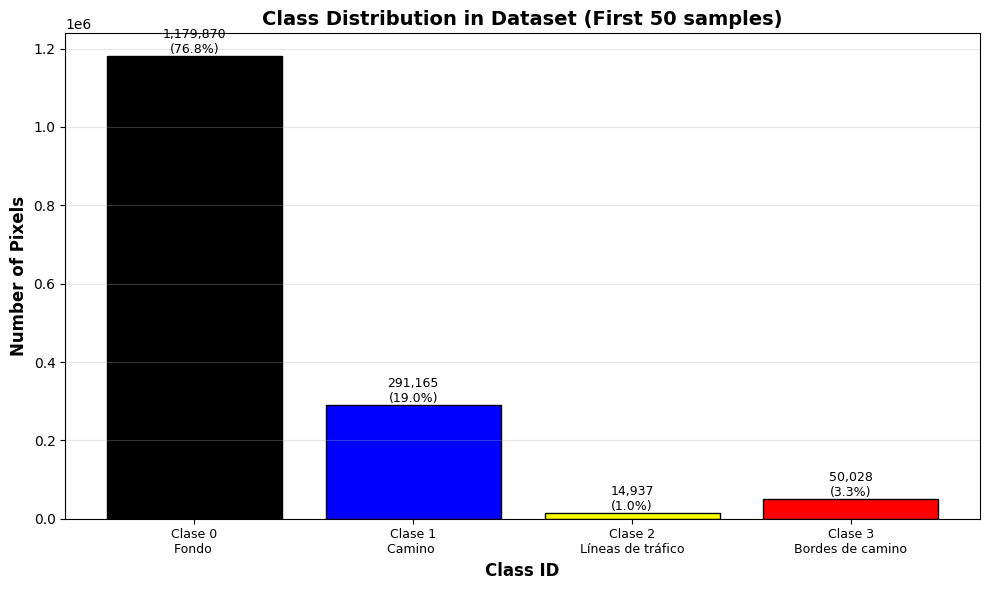


Class Distribution Summary:
  Clase 0: 1,179,870 pixels (76.81%)
  Clase 1: 291,165 pixels (18.96%)
  Clase 2: 14,937 pixels (0.97%)
  Clase 3: 50,028 pixels (3.26%)


In [7]:
if mask_files:
    # Count pixels per class across all masks
    class_counts = np.zeros(config.NUM_CLASSES, dtype=np.int64)
    
    print("Analyzing class distribution...")
    for mask_file in mask_files[:50]:  # Analyze first 50 for speed
        mask = cv2.imread(str(mask_file), cv2.IMREAD_GRAYSCALE)
        for class_id in range(config.NUM_CLASSES):
            class_counts[class_id] += np.sum(mask == class_id)
    
    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    
    colors = []
    labels = []
    for class_id in range(config.NUM_CLASSES):
        color_rgb = np.array(config.get_class_color(class_id, bgr=False)) / 255.0
        colors.append(color_rgb)
        labels.append(f"Clase {class_id}\n{config.get_class_name(class_id).split('/')[0]}")
    
    bars = ax.bar(range(config.NUM_CLASSES), class_counts, color=colors, edgecolor='black')
    ax.set_xlabel('Class ID', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Pixels', fontsize=12, fontweight='bold')
    ax.set_title('Class Distribution in Dataset (First 50 samples)', fontsize=14, fontweight='bold')
    ax.set_xticks(range(config.NUM_CLASSES))
    ax.set_xticklabels(labels, fontsize=9)
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, count) in enumerate(zip(bars, class_counts)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}\n({count/class_counts.sum()*100:.1f}%)',
                ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print("\nClass Distribution Summary:")
    for class_id in range(config.NUM_CLASSES):
        percentage = class_counts[class_id] / class_counts.sum() * 100
        print(f"  Clase {class_id}: {class_counts[class_id]:,} pixels ({percentage:.2f}%)")
else:
    print("❌ No masks to analyze")

## 7. Multiple Random Samples Grid

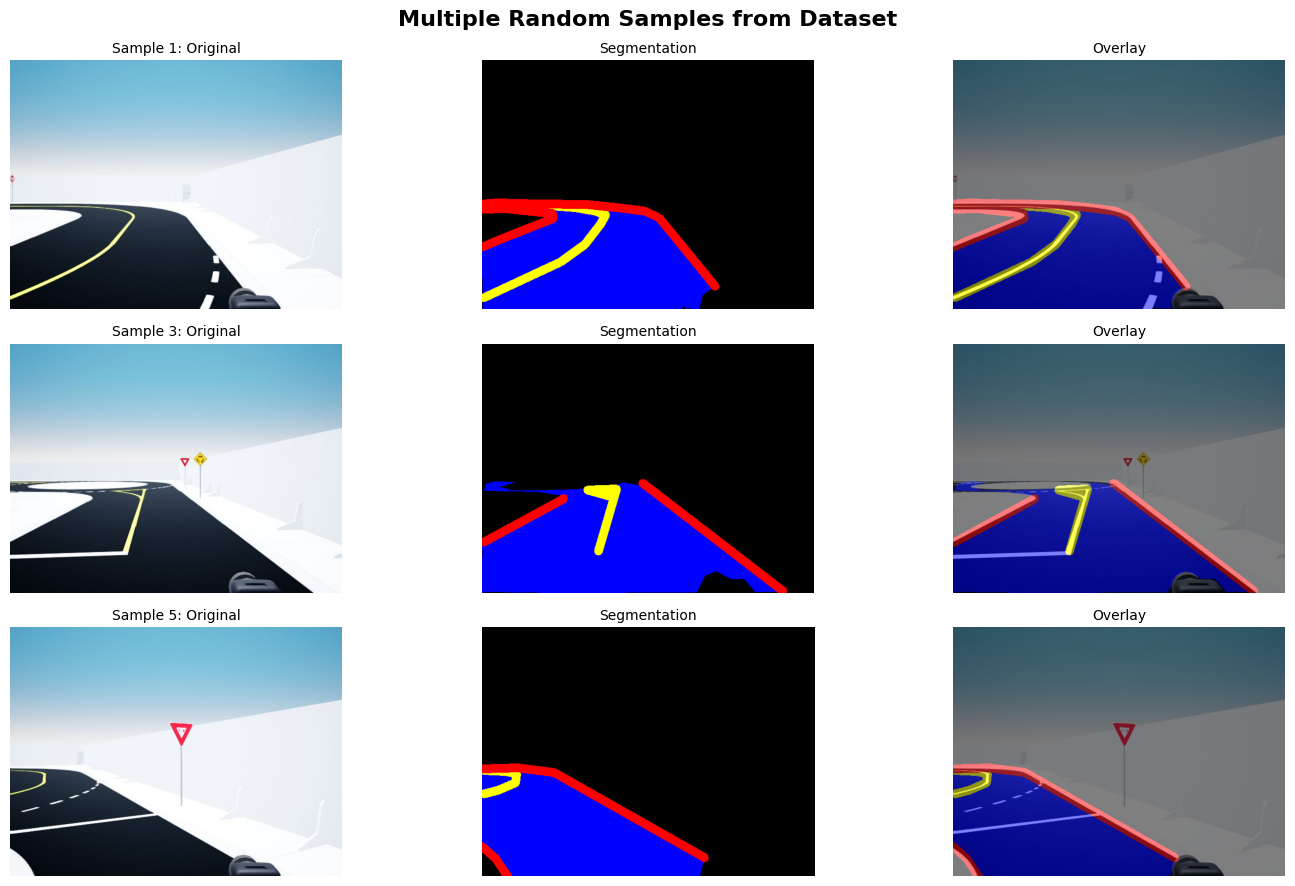

In [8]:
if image_files and len(image_files) >= 2:
    # Select 6 random samples
    num_samples = 3
    random_indices = random.sample(range(len(image_files)), num_samples)
    
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, num_samples * 3))
    
    for i, idx in enumerate(random_indices):
        # Load data
        image = cv2.imread(str(image_files[idx]))
        mask = cv2.imread(str(mask_files[idx]), cv2.IMREAD_GRAYSCALE)
        
        # Create visualizations
        colored_mask = visualize_mask(mask, use_colors=True)
        overlay = overlay_mask_on_image(image, mask, alpha=0.5)
        
        # Plot row
        axes[i, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i, 0].set_title(f'Sample {idx + 1}: Original', fontsize=10)
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(cv2.cvtColor(colored_mask, cv2.COLOR_BGR2RGB))
        axes[i, 1].set_title('Segmentation', fontsize=10)
        axes[i, 1].axis('off')
        
        axes[i, 2].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        axes[i, 2].set_title('Overlay', fontsize=10)
        axes[i, 2].axis('off')
    
    plt.suptitle('Multiple Random Samples from Dataset', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("❌ Not enough images for grid visualization")

## 8. Dataset Summary

In [9]:
print("="*60)
print("DATASET SUMMARY")
print("="*60)

if image_files:
    sample_image = cv2.imread(str(image_files[0]))
    height, width = sample_image.shape[:2]
    
    print(f"\n📊 Dataset Statistics:")
    print(f"  Training samples: {len(image_files)}")
    print(f"  Image dimensions: {width}x{height}")
    print(f"  Number of classes: {config.NUM_CLASSES}")
    print(f"\n🎨 Color Mapping:")
    for class_id in range(config.NUM_CLASSES):
        name = config.get_class_name(class_id)
        color = config.get_class_color(class_id, bgr=False)
        print(f"  Clase {class_id}: {name} → RGB{color}")
    print(f"\n💡 Tip: Use these functions for visualization:")
    print(f"  - visualize_mask(mask, use_colors=True)")
    print(f"  - overlay_mask_on_image(image, mask, alpha=0.5)")
else:
    print("\n❌ No dataset found. Run prepare_dataset.py first.")

print("\n" + "="*60)

DATASET SUMMARY

📊 Dataset Statistics:
  Training samples: 5
  Image dimensions: 640x480
  Number of classes: 4

🎨 Color Mapping:
  Clase 0: Fondo / Vereda / Obstáculos → RGB(0, 0, 0)
  Clase 1: Camino / Asfalto transitable → RGB(0, 0, 255)
  Clase 2: Líneas de tráfico → RGB(255, 255, 0)
  Clase 3: Bordes de camino → RGB(255, 0, 0)

💡 Tip: Use these functions for visualization:
  - visualize_mask(mask, use_colors=True)
  - overlay_mask_on_image(image, mask, alpha=0.5)

